# Análise de dados

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# HashMap de estados por região
regioes = {"Norte": {"PA", "RR", "AP", "AM", "TO", "RO", "AC", "MA"},
           "Nordeste": {"SE", "CE", "PB", "AL", "RN", "PE", "BA", "PI"},
           "Sudeste": {"MG", "RJ", "SP", "ES"},
           "Centro-Oeste": {"DF", "MS", "MT", "GO"},
           "Sul": {"PR", "SC", "RS"}}
# Lista de estados
lista_estados = []
for regiao in regioes:
    lista_estados += list(regioes[regiao])

## Percentual de mortes de pessoas negras em relação ao número total de mortes em acidente de transporte nos municípios brasileiros. Seguindo critério adotado pelo IBGE, foram consideradas negras, a soma das pessoas pretas e pardas.
Arquivo: [proporcao_mortes_negras_acidente_transporte](https://basedosdados.org/dataset/br-mobilidados-indicadores?bdm_table=proporcao_mortes_negras_acidente_transporte)

In [3]:
df_prop_mortes = pd.read_csv("../datasets/proporcao_mortes_negras_acidente_transporte.csv")

In [4]:
df_prop_mortes.head()

,ano,sigla_uf,id_municipio,indicador,prop_mortes_negras_acidente_transporte
0,2000,RO,1100015,Total,50.000000
1,2000,RO,1100023,Total,42.857143
2,2000,RO,1100031,Total,0.000000
3,2000,RO,1100049,Total,73.333333
4,2000,RO,1100056,Total,50.000000


## Orçamento de municípios por função
Arquivos:<br>
[finbra_2021.csv](https://drive.google.com/file/d/1bR2g3AZJORRJjTBCVQnqbCPCvO_VnuYD/view?usp=sharing)<br>
[finbra_2013.csv](https://drive.google.com/file/d/1jtf2Gi_IM_3BGu6awFgD17Wnofe_U5Vy/view?usp=sharing)<br>
[Fonte](https://siconfi.tesouro.gov.br/siconfi/pages/public/consulta_finbra/finbra_list.jsf)

In [5]:
despesas_2021 = pd.read_csv("../outros/finbra_2021.csv")

In [6]:
despesas_2021.head()

,Instituicao,Cod_municipio,UF,Populacao,Coluna,Conta,Identificador_Conta,Valor,Unnamed: 8
0,Prefeitura Municipal de Ibiraiaras - RS,4309902.0,RS,7265.0,Despesas Empenhadas,Despesas Exceto Intraor�ament�rias,siconfi-cor_TotalDespesas,30819758.0,NaN
1,Prefeitura Municipal de Ibiraiaras - RS,4309902.0,RS,7265.0,Despesas Empenhadas,01 - Legislativa,siconfi-cor_TotalDespesas,982533.0,NaN
2,Prefeitura Municipal de Ibiraiaras - RS,4309902.0,RS,7265.0,Despesas Empenhadas,01.031 - A��o Legislativa,siconfi-cor_TotalDespesas,982533.0,NaN
3,Prefeitura Municipal de Ibiraiaras - RS,4309902.0,RS,7265.0,Despesas Empenhadas,04 - Administra��o,siconfi-cor_TotalDespesas,2587777.0,41.0
4,Prefeitura Municipal de Ibiraiaras - RS,4309902.0,RS,7265.0,Despesas Empenhadas,04.122 - Administra��o Geral,siconfi-cor_TotalDespesas,1872925.0,38.0


In [7]:
despesas_2013 = pd.read_csv("../outros/finbra_2013.csv")

In [8]:
despesas_2013.head()

,Instituicao,Cod_municipio,UF,Populacao,Coluna,Conta,Identificador_Conta,Valor,Unnamed: 8
0,Prefeitura Municipal de Sulina - PR,4126652.0,PR,3366.0,Despesas Empenhadas,Despesas (Exceto Intra-Or�ament�rias),siconfi-cor_TotalDespesas,13531296.0,NaN
1,Prefeitura Municipal de Sulina - PR,4126652.0,PR,3366.0,Despesas Empenhadas,04 - Administra��o,siconfi-cor_TotalDespesas,3089348.0,NaN
2,Prefeitura Municipal de Sulina - PR,4126652.0,PR,3366.0,Despesas Empenhadas,04.122 - Administra��o Geral,siconfi-cor_TotalDespesas,3089348.0,NaN
3,Prefeitura Municipal de Sulina - PR,4126652.0,PR,3366.0,Despesas Empenhadas,08 - Assist�ncia Social,siconfi-cor_TotalDespesas,589100.0,34.0
4,Prefeitura Municipal de Sulina - PR,4126652.0,PR,3366.0,Despesas Empenhadas,08.241 - Assist�ncia ao Idoso,siconfi-cor_TotalDespesas,8854.0,49.0


## Tratamento dos dados da tabela sobre mortes negras

In [9]:
df_prop_mortes.rename(columns = {"prop_mortes_negras_acidente_transporte": "prop_mortes"}, inplace=True)

#### Observação
O dataset possui 3.240 linhas com o campo *id_municipio* vazio, então achei que seria melhor excluirmos essas linhas a fim de manter os dados mais consistentes.

In [10]:
# Linhas com id_municipio vazio
df_prop_mortes[df_prop_mortes["id_municipio"] == " "]

,ano,sigla_uf,id_municipio,indicador,prop_mortes
258,2000,PA,,Total,100.000000
976,2000,CE,,Total,83.333333
1086,2000,RN,,Total,0.000000
1165,2000,RN,,Total,100.000000
1396,2000,PB,,Total,0.000000
...,...,...,...,...,...
667773,2019,RS,,Outros,0.000000
667914,2019,RS,,Outros,0.000000
667927,2019,RS,,Outros,0.000000
668105,2019,MT,,Outros,0.000000


In [11]:
df_prop_mortes = df_prop_mortes[df_prop_mortes["id_municipio"] != " "]

### Informações sobre a Tabela

In [12]:
indicadores = df_prop_mortes["indicador"].unique()
indicadores

array(['Total', 'Pedestres', 'Ciclistas', 'Motociclistas',
       'Ocupantes de automóvel', 'Outros'], dtype=object)

In [13]:
estados = df_prop_mortes["sigla_uf"].unique()
estados

array(['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN',
       'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC',
       'RS', 'MS', 'MT', 'GO', 'DF'], dtype=object)

#### Observação
O dataset atual trata da morte de ciclistas, motoristas, pedestres, etc. Porém, para essa análise, somente as proporções totais serão usadas. Para isso, excluirei as linhas que tratam de outros tipos de acidentes.

In [14]:
df_prop_mortes = df_prop_mortes[df_prop_mortes["indicador"] == "Total"]

In [15]:
df_prop_mortes = df_prop_mortes.drop(["indicador"], axis=1)

### Os 10 municípios com maiores percentuais de mortes negras em 2000

In [16]:
df_prop_mortes[(df_prop_mortes["ano"] == 2000)].sort_values(by="prop_mortes", 
                                                            ascending=False)[:10]

,ano,sigla_uf,id_municipio,prop_mortes
3409,2000,SP,3512902,100.0
514,2000,MA,2103802,100.0
5233,2000,MT,5105002,100.0
1907,2000,BA,2906808,100.0
1905,2000,BA,2906600,100.0
1904,2000,BA,2906501,100.0
561,2000,MA,2106409,100.0
1901,2000,BA,2906204,100.0
5224,2000,MT,5104104,100.0
1887,2000,BA,2904902,100.0


### Os 10 municípios com maiores percentuais de mortes negras abaixo de 100% em 2000

In [17]:
df_prop_mortes[
    (df_prop_mortes["ano"] == 2000) & 
    (df_prop_mortes["prop_mortes"] != 100.0)
].sort_values(by="prop_mortes", ascending=False)[:10]

,ano,sigla_uf,id_municipio,prop_mortes
1542,2000,PE,2607208,94.736842
216,2000,PA,1504208,94.117647
1574,2000,PE,2609600,93.333333
489,2000,MA,2102325,91.666667
2000,2000,BA,2914653,91.666667
111,2000,AM,1302603,91.050584
186,2000,PA,1502400,90.476190
1584,2000,PE,2610608,90.000000
1050,2000,CE,2312304,90.000000
250,2000,PA,1506138,89.655172


### Os 10 municípios com maiores percentuais de mortes negras em 2019

In [18]:
df_prop_mortes[(df_prop_mortes["ano"] == 2019)].sort_values(by="prop_mortes", 
                                                            ascending=False)[:10]

,ano,sigla_uf,id_municipio,prop_mortes
638327,2019,SP,3507209,100.0
636303,2019,PB,2506251,100.0
638052,2019,MG,3170529,100.0
638054,2019,MG,3170602,100.0
636420,2019,PB,2515401,100.0
636418,2019,PB,2515203,100.0
638057,2019,MG,3170750,100.0
638058,2019,MG,3170800,100.0
636415,2019,PB,2514909,100.0
638059,2019,MG,3170909,100.0


### Os 10 municípios com maiores percentuais de mortes negras abaixo de 100% em 2019

In [19]:
df_prop_mortes[
    (df_prop_mortes["ano"] == 2019) & 
    (df_prop_mortes["prop_mortes"] != 100.0)
].sort_values(by="prop_mortes", ascending=False)[:10]

,ano,sigla_uf,id_municipio,prop_mortes
635243,2019,PA,1506807,97.590361
636982,2019,BA,2914802,97.435897
635166,2019,PA,1502400,97.142857
640432,2019,GO,5212501,96.875000
636631,2019,AL,2700300,96.794872
636936,2019,BA,2910800,96.296296
637040,2019,BA,2919553,96.000000
635591,2019,MA,2109908,95.652174
635469,2019,MA,2102325,95.652174
637116,2019,BA,2925303,95.454545


### Os 10 municípios com menores percentuais de mortes negras em 2000

In [20]:
df_prop_mortes[(df_prop_mortes["ano"] == 2000)].sort_values(by="prop_mortes")[:10]

,ano,sigla_uf,id_municipio,prop_mortes
2783,2000,MG,3146255,0.0
3412,2000,SP,3513207,0.0
3411,2000,SP,3513108,0.0
3407,2000,SP,3512704,0.0
3406,2000,SP,3512605,0.0
3405,2000,SP,3512506,0.0
3404,2000,SP,3512407,0.0
3413,2000,SP,3513306,0.0
3402,2000,SP,3512209,0.0
3400,2000,SP,3512001,0.0


### Os 10 municípios com menores percentuais de mortes negras acima de 0% em 2000

In [21]:
df_prop_mortes[
    (df_prop_mortes["ano"] == 2000) & 
    (df_prop_mortes["prop_mortes"] != 0.0)
].sort_values(by="prop_mortes")[:10]

,ano,sigla_uf,id_municipio,prop_mortes
4907,2000,RS,4314100,1.234568
3521,2000,SP,3522307,2.127660
4966,2000,RS,4316907,2.631579
5000,2000,RS,4318705,2.702703
3966,2000,PR,4104006,2.941176
2489,2000,MG,3122306,3.125000
5376,2000,GO,5205109,3.333333
4185,2000,PR,4119905,3.797468
2856,2000,MG,3152501,4.000000
4376,2000,SC,4204202,4.000000


### Os 10 municípios com menores percentuais de mortes negras em 2019

In [22]:
df_prop_mortes[(df_prop_mortes["ano"] == 2019)].sort_values(by="prop_mortes")[:10]

,ano,sigla_uf,id_municipio,prop_mortes
638230,2019,RJ,3305158,0.0
639117,2019,PR,4116406,0.0
639116,2019,PR,4116307,0.0
637903,2019,MG,3158409,0.0
639113,2019,PR,4116059,0.0
639112,2019,PR,4116000,0.0
639111,2019,PR,4115903,0.0
639110,2019,PR,4115853,0.0
639118,2019,PR,4116505,0.0
639109,2019,PR,4115804,0.0


### Os 10 municípios com menores percentuais de mortes negras acima de 0% em 2019

In [23]:
df_prop_mortes[
    (df_prop_mortes["ano"] == 2019) & 
    (df_prop_mortes["prop_mortes"] != 0.0)
].sort_values(by="prop_mortes")[:10]

,ano,sigla_uf,id_municipio,prop_mortes
639364,2019,SC,4204608,2.702703
638949,2019,PR,4104204,4.255319
639579,2019,SC,4219507,4.347826
640061,2019,RS,4322608,4.761905
639138,2019,PR,4117701,5.263158
639385,2019,SC,4205902,5.263158
639951,2019,RS,4317202,5.263158
638849,2019,SP,3554003,5.263158
638946,2019,PR,4104006,5.263158
639506,2019,SC,4214805,5.882353


## Tratamento dos dados das tabelas de despesas

#### Observação:
Apenas as linhas de despesas necessariamente pagas relacionadas a gastos com transporte serão usadas, já que outros tipos de investimento não serão necessários par essa análise. Também somente serão usadas as colunas com o código do município, sigla da unidade federativa e o valor da despesa paga em transporte.

In [24]:
desp_2021 = despesas_2021[
    (despesas_2021["Conta"] == "26 - Transporte") & 
    (despesas_2021["Coluna"] == "Despesas Pagas")
][["Cod_municipio", "UF", "Valor"]]
desp_2021.columns = ["id_municipio", "sigla_uf", "valor"]
desp_2021.head()

,id_municipio,sigla_uf,valor
137,4309902.0,RS,3766701.0
378,4308201.0,RS,16815173.0
578,4211652.0,SC,1835225.0
730,4315156.0,RS,3025385.0
965,4314001.0,RS,2612626.0


In [25]:
desp_2013 = despesas_2013[
    (despesas_2013["Conta"] == "26 - Transporte") & 
    (despesas_2013["Coluna"] == "Despesas Pagas")
][["Cod_municipio", "UF", "Valor"]]
desp_2013.columns = ["id_municipio", "sigla_uf", "valor"]
desp_2013.head()

,id_municipio,sigla_uf,valor
98,4126652.0,PR,1583648.0
259,4206652.0,SC,1582579.0
457,4310405.0,RS,413069.0
625,4322533.0,RS,1378911.0
866,4318705.0,RS,774243.0


### Médias de investimento das regiões em 2021

In [26]:
lista_medias = []
for regiao in regioes:
  media = int(desp_2021[desp_2021["sigla_uf"].isin(regioes[regiao])]["valor"].mean())
  lista_medias.append(media)

desp_med_2021 = pd.DataFrame(lista_medias, 
                             index=regioes, 
                             columns=["media"]).sort_values(by="media", ascending=False)

In [27]:
desp_med_2021

,media
Sudeste,6844551
Centro-Oeste,3880576
Norte,3302650
Sul,3201229
Nordeste,1122277


In [28]:
lista_medias = []
for regiao in regioes:
  media = int(desp_2013[desp_2013["sigla_uf"].isin(regioes[regiao])]["valor"].mean())
  lista_medias.append(media)

desp_med_2013 = pd.DataFrame(lista_medias, 
                             index=regioes, 
                             columns=["media"]).sort_values(by="media", ascending=False)

In [29]:
desp_med_2013

,media
Sudeste,3644537
Centro-Oeste,1835748
Sul,1639701
Norte,1339501
Nordeste,469182


### Aumento em porcentagem do investimento em transporte entre 2013 e 2021 de cada região

In [30]:
variacao_media_prop = ((desp_med_2021 - desp_med_2013) / desp_med_2013).sort_values(by="media", ascending=False)
variacao_media_prop.columns=["variação média"]

In [31]:
variacao_media_prop

,variação média
Norte,1.465582
Nordeste,1.391986
Centro-Oeste,1.113894
Sul,0.952325
Sudeste,0.878030


## Análise dos Dados

In [32]:
periodo_prop_mortes = range(2000, 2020)

### Analisando a média da porcentagem de mortes totais por região durante o período de 2000 a 2019

In [33]:
def get_media_prop_by_regiao(regiao, ano):
    """
    :param regiao: região a ser selecionada
    :param indicador: indicador a ser selecionado
    :param ano: ano a ser selecionado
    :return: média do percentual de pessoas próximas a redes de transporte
    """
    media = df_prop_mortes[(df_prop_mortes["ano"] == ano) &
                           (df_prop_mortes["sigla_uf"].isin(regioes[regiao]))]["prop_mortes"].mean()
    return media

In [34]:
medias_regiao = [get_media_prop_by_regiao(regiao, ano) 
                 for ano in periodo_prop_mortes
                 for regiao in regioes]

df_med_prop_mortes = pd.DataFrame(np.array(medias_regiao).reshape(20, 5),
                   index=periodo_prop_mortes, columns=regioes)
df_med_prop_mortes.index.name, df_med_prop_mortes.columns.name = "ano", "regiões"
df_med_prop_mortes

regiões,Norte,Nordeste,Sudeste,Centro-Oeste,Sul
ano,,,,,
2000,29.560408,30.349222,12.580914,25.041536,6.709749
2001,31.352602,31.594545,12.548748,25.637168,4.946367
2002,33.834800,36.357453,15.910428,27.192868,5.703911
2003,37.652775,35.849409,16.677576,30.695071,4.760621
2004,41.109654,39.130150,18.472241,33.262062,6.542713
2005,42.100618,42.930704,18.718518,34.763734,5.509339
2006,42.011893,45.786810,18.933193,34.678147,5.344307
2007,47.416009,49.132648,19.743834,33.692464,5.686003
2008,48.965923,51.039311,22.187816,38.098961,5.617049


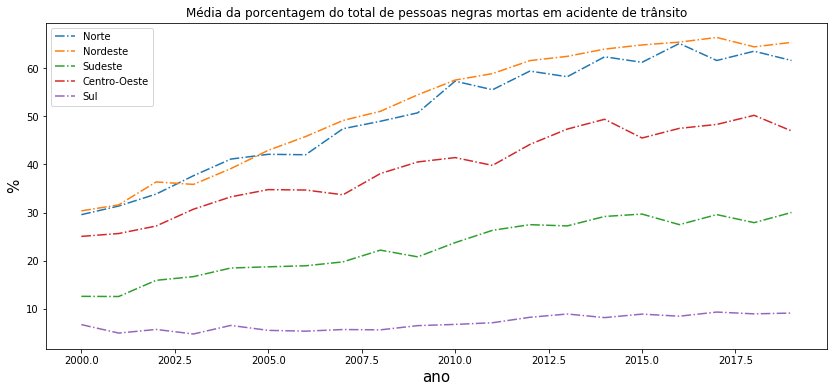

In [35]:
plt.figure(figsize=(14,6))
plt.plot(df_med_prop_mortes, '-.')
plt.title("Média da porcentagem do total de pessoas negras mortas em acidente de trânsito")
plt.xlabel("ano", size=15)
plt.ylabel("%", size=15)
plt.legend(regioes, loc="upper left")
plt.show()

#### Observação
Podemos notar que houve aumento no porcentagem de mortes de pessoas negras no trânsito em todas as regiões. Todas as regiões, exceto a Sul, praticamente dobraram suas porcentagens de 2000 para 2019. A região Sul foi a que teve o menor aumento, variando de 6% em 2000 para 9% ao fim de 2019.

### Analisando a variação da porporção de mortes entre os municípios nas regiões

In [36]:
df_prop_2000 = df_prop_mortes[df_prop_mortes["ano"] == 2000]
df_prop_2000.index = df_prop_2000["id_municipio"]
df_prop_2000 = df_prop_2000.drop(["id_municipio", "ano"], axis=1)
df_prop_2000.head()

,sigla_uf,prop_mortes
id_municipio,,
1100015,RO,50.000000
1100023,RO,42.857143
1100031,RO,0.000000
1100049,RO,73.333333
1100056,RO,50.000000


In [37]:
df_prop_2013 = df_prop_mortes[df_prop_mortes["ano"] == 2013]
df_prop_2013.index = df_prop_2013["id_municipio"]
df_prop_2013 = df_prop_2013.drop(["id_municipio", "ano"], axis=1)
df_prop_2013.head()

,sigla_uf,prop_mortes
id_municipio,,
1100015,RO,28.571429
1100023,RO,60.784314
1100031,RO,0.000000
1100049,RO,55.555556
1100056,RO,42.857143


In [38]:
df_prop_2019 = df_prop_mortes[df_prop_mortes["ano"] == 2019]
df_prop_2019.index = df_prop_2019["id_municipio"]
df_prop_2019 = df_prop_2019.drop(["id_municipio", "ano"], axis=1)
df_prop_2019.head()

,sigla_uf,prop_mortes
id_municipio,,
1100015,RO,60.000000
1100023,RO,84.615385
1100031,RO,100.000000
1100049,RO,64.179104
1100056,RO,50.000000


In [39]:
coluna_dif_2000 = df_prop_2013["prop_mortes"] - df_prop_2000["prop_mortes"]
df_diferenca_prop_2000 = pd.DataFrame(df_prop_2000)
df_diferenca_prop_2000["diferenca"] = coluna_dif_2000
df_diferenca_prop_2000 = df_diferenca_prop_2000.drop(["prop_mortes"], axis=1)
df_diferenca_prop_2000.head()

,sigla_uf,diferenca
id_municipio,,
1100015,RO,-21.428571
1100023,RO,17.927171
1100031,RO,0.000000
1100049,RO,-17.777778
1100056,RO,-7.142857


In [40]:
coluna_dif_2013 = df_prop_2019["prop_mortes"] - df_prop_2013["prop_mortes"]
df_diferenca_prop_2013 = pd.DataFrame(df_prop_2013)
df_diferenca_prop_2013["diferenca"] = coluna_dif_2013
df_diferenca_prop_2013 = df_diferenca_prop_2013.drop(["prop_mortes"], axis=1)
df_diferenca_prop_2013.head()

,sigla_uf,diferenca
id_municipio,,
1100015,RO,31.428571
1100023,RO,23.831071
1100031,RO,100.000000
1100049,RO,8.623549
1100056,RO,7.142857


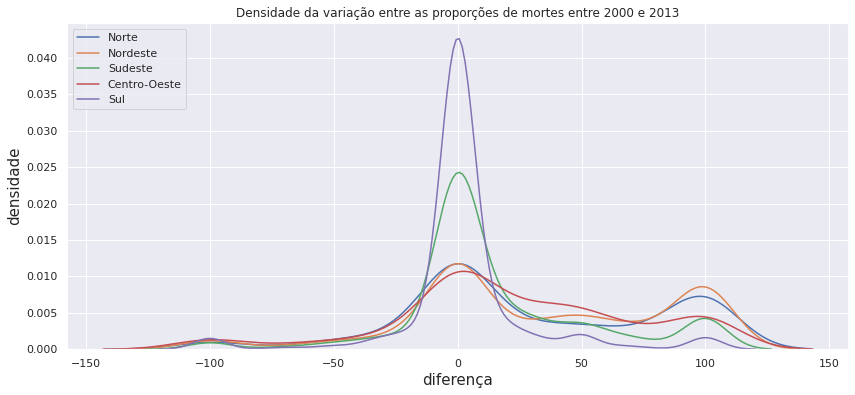

In [41]:
sns.set(style="darkgrid")
plt.figure(figsize=(14,6))
for regiao in regioes:
    regiao_diferencas = df_diferenca_prop_2000[df_diferenca_prop_2000["sigla_uf"].isin(regioes[regiao])]["diferenca"]
    sns.kdeplot(regiao_diferencas)
plt.title("Densidade da variação entre as proporções de mortes entre 2000 e 2013")
plt.xlabel("diferença", size=15)
plt.ylabel("densidade", size=15)
plt.legend(regioes, loc="upper left")
plt.show()

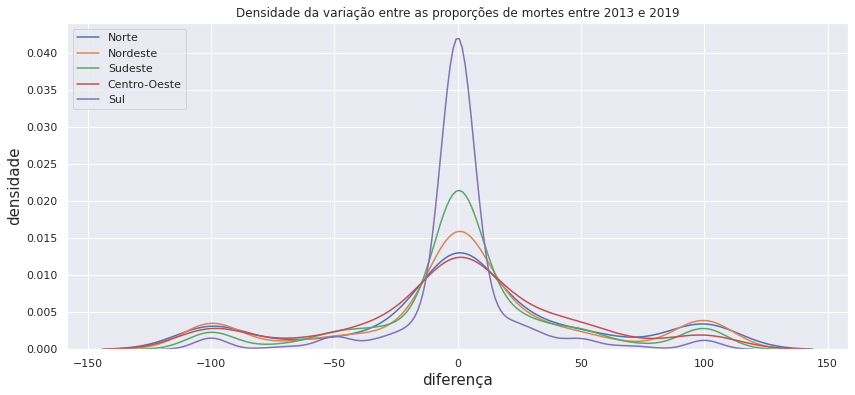

In [42]:
sns.set(style="darkgrid")
plt.figure(figsize=(14,6))
for regiao in regioes:
    regiao_diferencas = df_diferenca_prop_2013[df_diferenca_prop_2013["sigla_uf"].isin(regioes[regiao])]["diferenca"]
    sns.kdeplot(regiao_diferencas)
plt.title("Densidade da variação entre as proporções de mortes entre 2013 e 2019")
plt.xlabel("diferença", size=15)
plt.ylabel("densidade", size=15)
plt.legend(regioes, loc="upper left")
plt.show()

#### Observação
Podemos ver que a região Sul foi a que manteve a maior parte de seus municípios sem uma mudança significativa das mortes. A região Sudeste também apresenta pouca mudança em boa parte dos seus municípios, porém já apresenta um certo grau de desigualdade, visto que existem outros muitos municípios com aumentos significativos na proporção de negros mortos em acidentes no transporte. Por fim, é perceptível que as regiões Norte, Nordeste e Centro-Oeste apresentam uma desigualdade acentuada no aumento de proporção, com boa parte de seus municípios tendo aumento de 50% a 100%, enquanto outros não apresentam mudanças significativas.

### Analisando a proporção de mortes negras entre os municípios nas regiões em 2000

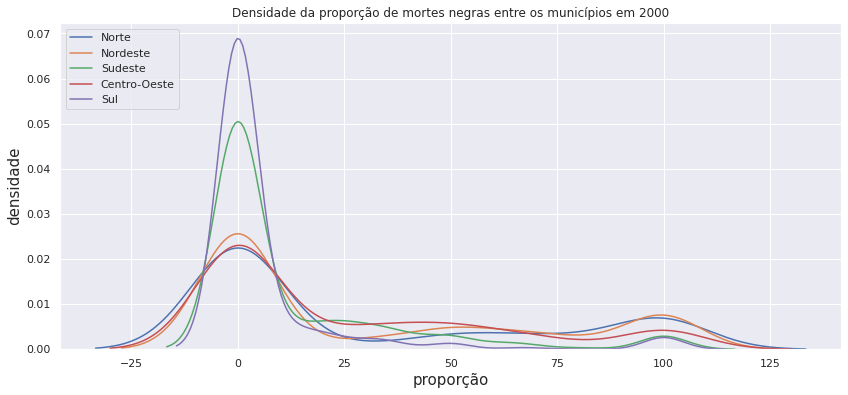

In [43]:
sns.set(style="darkgrid")
plt.figure(figsize=(14,6))
for regiao in regioes:
    regiao_proporcoes = df_prop_2000[df_prop_2000["sigla_uf"].isin(regioes[regiao])]["prop_mortes"]
    sns.kdeplot(regiao_proporcoes)
plt.title("Densidade da proporção de mortes negras entre os municípios em 2000")
plt.xlabel("proporção", size=15)
plt.ylabel("densidade", size=15)
plt.legend(regioes, loc="upper left")
plt.show()

### Analisando a proporção de mortes negras entre os municípios nas regiões em 2013

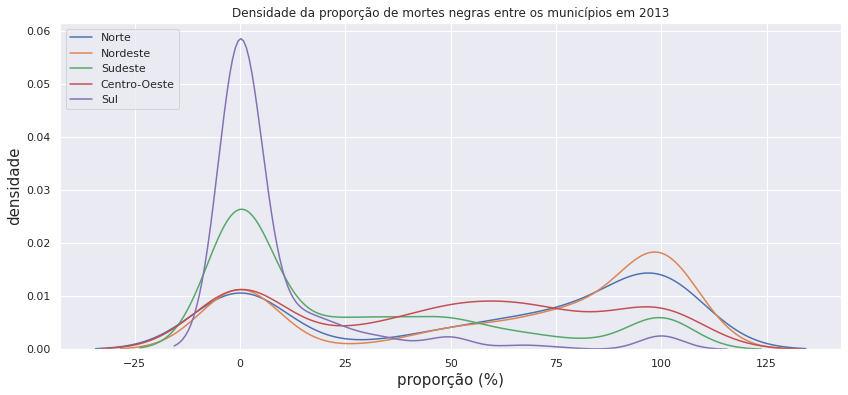

In [44]:
sns.set(style="darkgrid")
plt.figure(figsize=(14,6))
for regiao in regioes:
    regiao_proporcoes = df_prop_2013[df_prop_2013["sigla_uf"].isin(regioes[regiao])]["prop_mortes"]
    sns.kdeplot(regiao_proporcoes)
plt.title("Densidade da proporção de mortes negras entre os municípios em 2013")
plt.xlabel("proporção (%)", size=15)
plt.ylabel("densidade", size=15)
plt.legend(regioes, loc="upper left")
plt.show()

### Analisando a proporção de mortes negras entre os municípios nas regiões em 2019

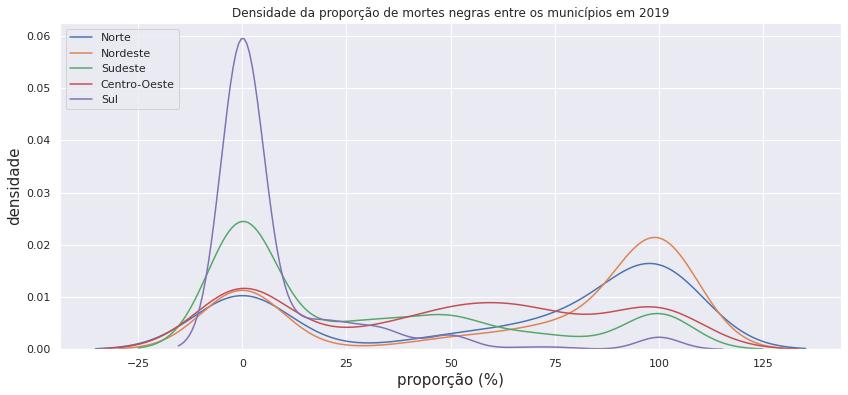

In [45]:
sns.set(style="darkgrid")
plt.figure(figsize=(14,6))
for regiao in regioes:
    regiao_proporcoes = df_prop_2019[df_prop_2019["sigla_uf"].isin(regioes[regiao])]["prop_mortes"]
    sns.kdeplot(regiao_proporcoes)
plt.title("Densidade da proporção de mortes negras entre os municípios em 2019")
plt.xlabel("proporção (%)", size=15)
plt.ylabel("densidade", size=15)
plt.legend(regioes, loc="upper left")
plt.show()

#### Observação
A partir do primeiro gráfico, podemos observar que a maioria dos municípios apresentavam uma proporção baixa de mortes negras. Entretanto, já é possível perceber que as regiões Norte, Nordeste e Centro-Oeste já se distoam bastante da Sudeste e Sul, apresentando muitos municípios com proporções acima de 50%.<br>
No segundo gráfico, é possível perceber que a região Sul se manteve próxima da sua situação anterior, enquanto todas as outras regiões apresentaram um aumento na maioria dos seus municípios de mortes negras. Os casos de maior aumento talvez sejam das regiões Norte e Nordeste, onde o número de municípios com proporção próximo de 100% aumentou enormemente.

### Analisando a variação das despesas em transporte nos municípios nas regiões

In [46]:
desp_2013.index = desp_2013["id_municipio"].astype(int)
desp_2013 = desp_2013.drop(["id_municipio"], axis=1)
desp_2013

,sigla_uf,valor
id_municipio,,
4126652,PR,1583648.0
4206652,SC,1582579.0
4310405,RS,413069.0
4322533,RS,1378911.0
4318705,RS,774243.0
...,...,...
1500404,PA,1286655.0
1503309,PA,353916.0
2505279,PB,115926.0


In [47]:
desp_2021.index = desp_2021["id_municipio"].astype(int)
desp_2021 = desp_2021.drop(["id_municipio"], axis=1)
desp_2021

,sigla_uf,valor
id_municipio,,
4309902,RS,3766701.0
4308201,RS,16815173.0
4211652,SC,1835225.0
4315156,RS,3025385.0
4314001,RS,2612626.0
...,...,...
3532157,SP,384336.0
4206702,SC,4673928.0
1703909,TO,170065.0


In [48]:
dif_despesa = pd.DataFrame(desp_2013["sigla_uf"])
dif_despesa["diferenca"] = (desp_2021["valor"] - desp_2013["valor"]) / desp_2013["valor"]
dif_despesa = dif_despesa.dropna()
dif_despesa.head()

,sigla_uf,diferenca
id_municipio,,
4126652,PR,0.897629
4206652,SC,0.548615
4310405,RS,4.477782
4322533,RS,0.494787
4318705,RS,2.647638


In [49]:
dif_despesa = dif_despesa[(dif_despesa["diferenca"] > -2) & (dif_despesa["diferenca"] < 2)]

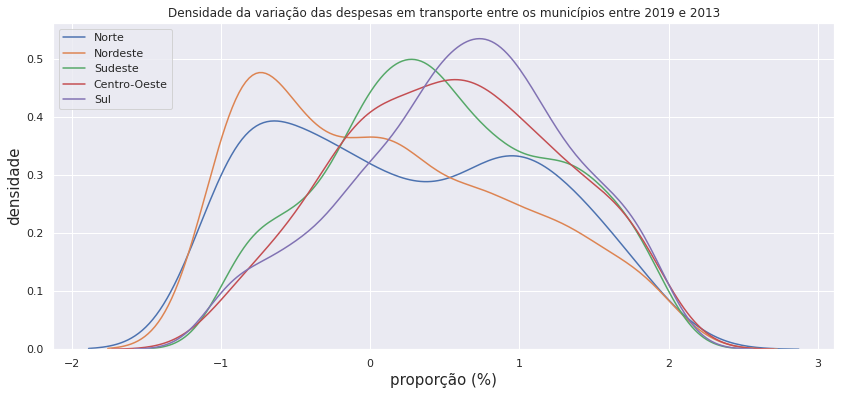

In [50]:
sns.set(style="darkgrid")
plt.figure(figsize=(14,6))
for regiao in regioes:
    regiao_diferencas = dif_despesa[dif_despesa["sigla_uf"].isin(regioes[regiao])]["diferenca"]
    sns.kdeplot(regiao_diferencas)
plt.title("Densidade da variação das despesas em transporte entre os municípios entre 2019 e 2013")
plt.xlabel("proporção (%)", size=15)
plt.ylabel("densidade", size=15)
plt.legend(regioes, loc="upper left")
plt.show()

In [51]:
df_diferenca_prop_2000["diferenca"] = df_diferenca_prop_2000["diferenca"] / 100
df_diferenca_prop_2000.sort_values(by="diferenca", ascending=False)

,sigla_uf,diferenca
id_municipio,,
5006275,MS,1.0
2517001,PB,1.0
2104073,MA,1.0
2607703,PE,1.0
2607653,PE,1.0
...,...,...
2202737,PI,-1.0
2615904,PE,-1.0
2608057,PE,-1.0


In [52]:
df_diferenca_prop_2013["diferenca"] = df_diferenca_prop_2013["diferenca"] / 100
df_diferenca_prop_2013.sort_values(by="diferenca", ascending=False)

,sigla_uf,diferenca
id_municipio,,
2205607,PI,1.0
1506401,PA,1.0
2801108,SE,1.0
2800704,SE,1.0
5215900,GO,1.0
...,...,...
2911659,BA,-1.0
2911857,BA,-1.0
2912301,BA,-1.0


In [53]:
dif_despesa.sort_values(by="diferenca", ascending=False)

,sigla_uf,diferenca
id_municipio,,
3105509,MG,1.995795
3530409,SP,1.991617
1712009,TO,1.985166
4206306,SC,1.984162
4320800,RS,1.981526
...,...,...
3129103,MG,-0.999312
2106805,MA,-0.999697
4126009,PR,-0.999756


In [54]:
dif_despesa_prop_2000 = dif_despesa.copy()
dif_despesa_prop_2000.rename(columns = {"diferenca": "diferenca_desp"}, inplace=True)
dif_despesa_prop_2000["diferenca_prop_2000"] = df_diferenca_prop_2000["diferenca"] / 100
dif_despesa_prop_2000

,sigla_uf,diferenca_desp,diferenca_prop_2000
id_municipio,,,
4126652,PR,0.897629,NaN
4206652,SC,0.548615,NaN
4322533,RS,0.494787,NaN
2200608,PI,0.141221,NaN
4300703,RS,1.500907,NaN
...,...,...,...
3171709,MG,1.834136,NaN
1500404,PA,-0.698372,NaN
1503309,PA,0.102533,NaN


In [55]:
len(dif_despesa_prop_2000[dif_despesa_prop_2000["diferenca_prop_2000"].isnull()])

2579

#### Observação:
Como não há nenhum município presente nos dois conjuntos de dados, farei uma análise a partir dos estados para as regiões.

In [56]:
media_dif_prop_2000 = {}
media_dif_prop_2013 = {}
media_dif_despesa = {}
for estado in lista_estados:
    media_dif_prop_2000[estado] = df_diferenca_prop_2000[
        df_diferenca_prop_2000["sigla_uf"] == estado]["diferenca"].mean()
    media_dif_prop_2013[estado] = df_diferenca_prop_2013[
        df_diferenca_prop_2013["sigla_uf"] == estado]["diferenca"].mean()
    media_dif_despesa[estado] = dif_despesa[dif_despesa["sigla_uf"] == estado]["diferenca"].mean()

In [57]:
df_media_estados = pd.DataFrame(media_dif_prop_2000, index=["dif_media_prop_2000"]).T

In [58]:
df_media_estados["dif_media_prop_2013"] = pd.DataFrame(media_dif_prop_2013, index=["dif_media_prop_2013"]).T

In [59]:
df_media_estados["dif_media_despesa"] = pd.Series(media_dif_despesa)

In [60]:
df_media_estados

,dif_media_prop_2000,dif_media_prop_2013,dif_media_despesa
TO,0.140303,0.045310,0.298310
RO,0.146362,0.096583,0.552573
AC,0.376144,0.035437,0.414680
AM,0.155142,-0.050952,0.174190
AP,0.223447,0.111443,0.186910
PA,0.336377,0.055700,0.267315
MA,0.429510,0.024654,-0.006454
RR,0.068058,-0.104322,1.478562
SE,0.369786,0.110414,0.013743
RN,0.081175,0.006164,0.304411


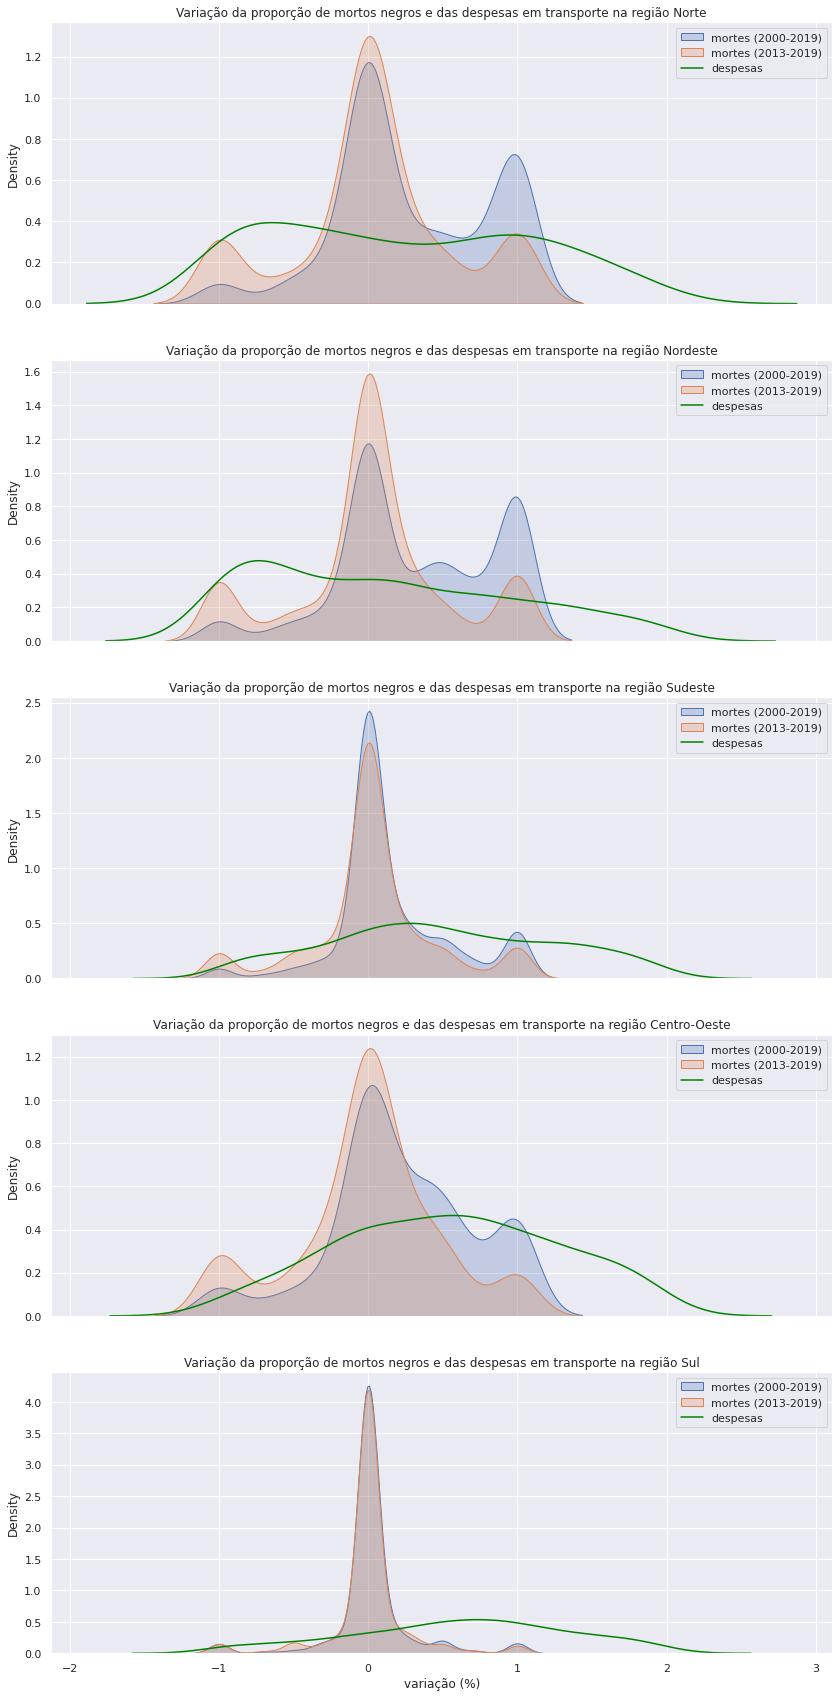

In [61]:
sns.set(style="darkgrid")
f, axes = plt.subplots(5, 1, figsize=(14, 30), sharex=True)

for i, regiao in enumerate(regioes):
    regiao_dif_prop_2000 = df_diferenca_prop_2000[
        df_diferenca_prop_2000["sigla_uf"].isin(regioes[regiao])]["diferenca"]
    regiao_dif_prop_2013 = df_diferenca_prop_2013[
        df_diferenca_prop_2013["sigla_uf"].isin(regioes[regiao])]["diferenca"]
    regiao_dif_despesa = dif_despesa[dif_despesa["sigla_uf"].isin(regioes[regiao])]["diferenca"]
    
    sns.kdeplot(regiao_dif_prop_2000, shade=True, ax=axes[i], label="mortes (2000-2019)")
    sns.kdeplot(regiao_dif_prop_2013, shade=True, ax=axes[i], label="mortes (2013-2019)")
    sns.kdeplot(regiao_dif_despesa, ax=axes[i], color="green", label="despesas")
    axes[i].set_title("Variação da proporção de mortos negros e das despesas em transporte na região " + regiao)
    axes[i].legend()
    axes[i].set_xlabel("variação (%)")
plt.show()

In [62]:
df_prop_2013

,sigla_uf,prop_mortes,diferenca
id_municipio,,,
1100015,RO,28.571429,31.428571
1100023,RO,60.784314,23.831071
1100031,RO,0.000000,100.000000
1100049,RO,55.555556,8.623549
1100056,RO,42.857143,7.142857
...,...,...,...
1504752,PA,0.000000,100.000000
4212650,SC,20.000000,-20.000000
4220000,SC,100.000000,-100.000000


In [63]:
df_prop_2019

,sigla_uf,prop_mortes
id_municipio,,
1100015,RO,60.000000
1100023,RO,84.615385
1100031,RO,100.000000
1100049,RO,64.179104
1100056,RO,50.000000
...,...,...
1504752,PA,100.000000
4212650,SC,0.000000
4220000,SC,0.000000


In [64]:
mortes_0_25 = len(df_prop_2000[df_prop_2000["prop_mortes"] < 25])
mortes_25_50 = len(df_prop_2000[(df_prop_2000["prop_mortes"] >= 25) & (df_prop_2000["prop_mortes"] < 50)])
mortes_25_50

393

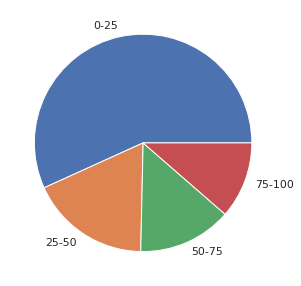

In [65]:
fatias = [(0, 25), (25, 50), (50, 75), (75, 100)]
porcentagens = []
for fatia in fatias:
    quantidade = len(df_prop_2000[(df_prop_2000["prop_mortes"] >= fatia[0]) & 
                                  (df_prop_2000["prop_mortes"] <= fatia[1]) &
                                  (df_prop_2000["sigla_uf"].isin(regioes["Centro-Oeste"]))])
    porcentagens.append(quantidade)

labels= ["0-25", "25-50", "50-75", "75-100"] 
fig = plt.figure(figsize =(5, 5)) 
plt.pie(porcentagens, labels = labels) 
plt.show() 

In [66]:
def tamanho_by_intervalo_regiao(dataframe, limite, regiao):
    if limite == 25:
        return len(dataframe[(dataframe["sigla_uf"].isin(regioes[regiao])) & 
                             (dataframe["prop_mortes"] <= 25)])
    elif limite == 50:
        return len(dataframe[(dataframe["sigla_uf"].isin(regioes[regiao])) & 
                             (dataframe["prop_mortes"] > 25) &
                             (dataframe["prop_mortes"] <= 50)])
    elif limite == 75:
        return len(dataframe[(dataframe["sigla_uf"].isin(regioes[regiao])) & 
                             (dataframe["prop_mortes"] > 50) & 
                             (dataframe["prop_mortes"] <= 75)])
    else:
        return len(dataframe[(dataframe["sigla_uf"].isin(regioes[regiao])) & 
                             (dataframe["prop_mortes"] > 75)])

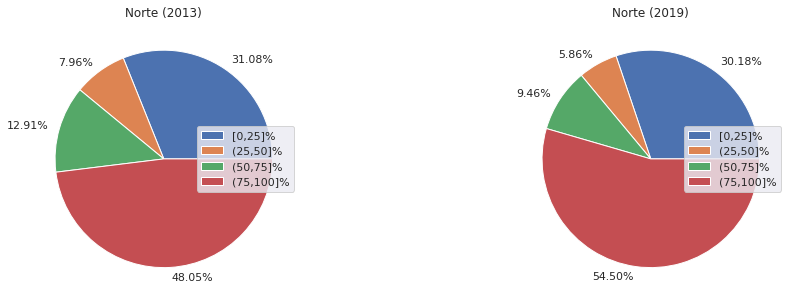

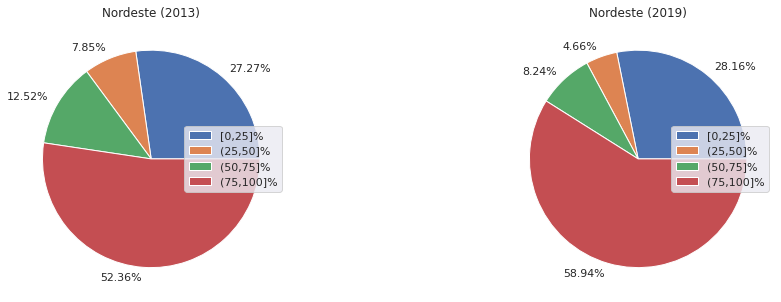

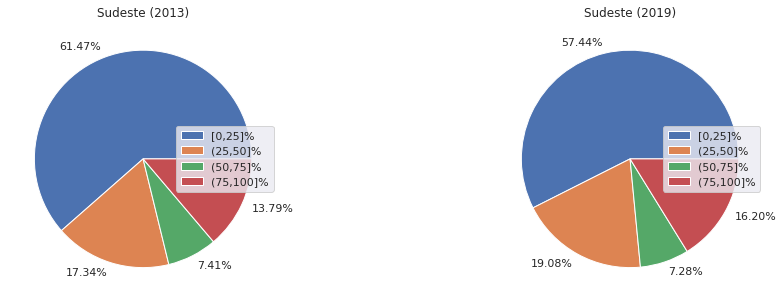

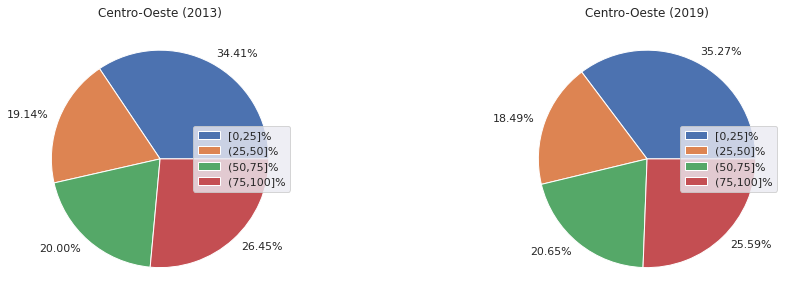

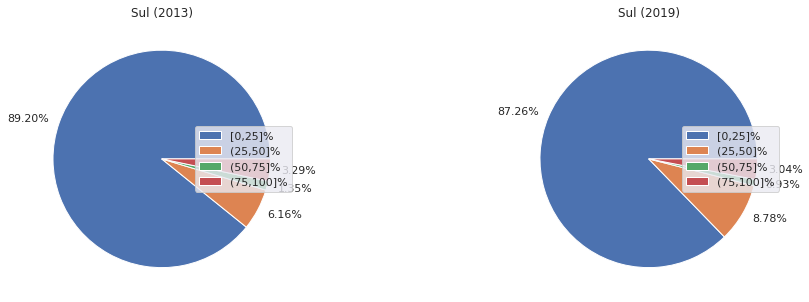

In [68]:
legenda = ["[0,25]%", "(25,50]%", "(50,75]%", "(75,100]%"]
limites = [25, 50, 75, 100]
for regiao in regioes:
    fig, axs = plt.subplots(1, 2, figsize=(16,5))
    for j, df_ano in enumerate([df_prop_2013, df_prop_2019]):
        total = (len(df_ano[df_ano["sigla_uf"].isin(regioes[regiao])]))
        porcentagens = []
        labels = []
        for limite in limites:
            qtd = tamanho_by_intervalo_regiao(df_ano, limite, regiao)
            porcentagens.append(qtd)
            labels.append("{0:.2f}%".format((qtd / total) * 100))
        axs[j].pie(porcentagens, labels=labels)
        axs[j].set_title("{0} ({1})".format(regiao, 2013 + j*6))
        axs[j].legend(legenda, loc="center right")
    plt.show()